In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing Neccessary Libraries

import numpy as np
#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers # a layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense, Flatten 
#Flatten-used fot flattering the input or change the dimension
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout #convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
#performing data augmentation to train the data
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data augmentation to test the data
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/TEST_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 1411 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [10]:
print(x_train.class_indices)#checking  the no. of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [11]:
model = Sequential()

In [12]:
classifier = Sequential()

In [13]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64,64,3),activation='relu'))

In [14]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
classifier.add(Conv2D(32, (3,3),activation='relu'))

In [16]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
classifier.add(Flatten())

In [18]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5,activation='softmax'))

In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [20]:
###Compiling the model

In [22]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Train the model
classifier.fit_generator (x_train, samples_per_epoch = 8000, epochs 25, validation_data=x_test, nb_val_samples=2000)

In [24]:
classifier.save('nutrition.h5')

In [25]:
from tensorflow.keras.models import load_model

In [26]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image 
model = load_model("nutrition.h5")

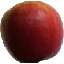

In [27]:
img = image.load_img(r'/content/drive/MyDrive/Dataset/TRAIN_SET/APPLES/5_100.jpg',grayscale=False,target_size= (64,64))
img

In [28]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x)) 
pred

1/1 [==============================] - 0s 113ms/step


2

In [29]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'APPLES'